# Dataset

The [Dataset](../api/Dataset.html#mikeio.Dataset) is the MIKE IO data
structure for data from dfs files. The
[`mikeio.read`](../api/read.html#mikeio.read) methods returns a Dataset
as a container of [DataArray](../api/DataArray.html#mikeio.DataArray)
(Dfs items). Each DataArray has the properties, *item*, *time*,
*geometry* and *values*. The time and geometry are common to all
DataArrays in the Dataset.

The Dataset has the following primary properties:

-   **items** - a list of
    [`mikeio.ItemInfo`](../api/ItemInfo.html#mikeio.ItemInfo) items for
    each dataarray
-   **time** - a
    [`pandas.DatetimeIndex`](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex)
    with the time instances of the data
-   **geometry** - a Geometry object with the spatial description of the
    data

Use Dataset’s string representation to get an overview of the Dataset

In [1]:
import mikeio
ds = mikeio.read("../data/HD2D.dfsu")
ds

<mikeio.Dataset>
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

##  Selecting items

Selecting a specific item “itemA” (at position 0) from a Dataset ds can
be done with:

-   `ds[["itemA"]]` - returns a new Dataset with “itemA”
-   `ds["itemA"]` - returns “itemA” DataArray
-   `ds[[0]]` - returns a new Dataset with “itemA”
-   `ds[0]` - returns “itemA” DataArray
-   `ds.itemA` - returns “itemA” DataArray

We recommend the use *named* items for readability.

In [2]:
ds.Surface_elevation

<mikeio.DataArray>
name: Surface elevation
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)

Negative index e.g. ds\[-1\] can also be used to select from the end.
Several items (“itemA” at 0 and “itemC” at 2) can be selected with the
notation:

-   `ds[["itemA", "itemC"]]`
-   `ds[[0, 2]]`

Note that this behavior is similar to pandas and xarray.

##  Temporal selection

A time slice of a Dataset can be selected in several different ways.

In [3]:
ds.sel(time="1985-08-06 12:00")

<mikeio.Dataset>
dims: (element:884)
time: 1985-08-06 12:00:00 (time-invariant)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

In [4]:
ds["1985-8-7":]

<mikeio.Dataset>
dims: (time:2, element:884)
time: 1985-08-07 00:30:00 - 1985-08-07 03:00:00 (2 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

##  Spatial selection

The `sel` method finds a single element.

In [5]:
ds.sel(x=607002, y=6906734)

<mikeio.Dataset>
dims: (time:9)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: GeometryPoint2D(x=607002.7094112666, y=6906734.833048992)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

##  Plotting

In most cases, you will *not* plot the Dataset, but rather it’s
DataArrays. But there are two exceptions:

-   dfs0-Dataset : plot all items as timeseries with ds.plot()
-   scatter : compare two items using ds.plot.scatter(x=“itemA”,
    y=“itemB”)

See details in the [Dataset Plotter
API](../api/dataset._DatasetPlotter.html#mikeio.dataset._DatasetPlotter).

## Add a new item

A common workflow is to create a new item based on existing items in a
dataset.

This can be in done in several ways. Let’s try one of the options.

In [6]:
ds = mikeio.read("../data/NorthSea_HD_and_windspeed.dfsu")
ds

<mikeio.Dataset>
dims: (time:67, element:958)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)
geometry: Dfsu2D (958 elements, 570 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Wind speed <Wind speed> (meter per sec)

1.  Create a copy of the DataArray

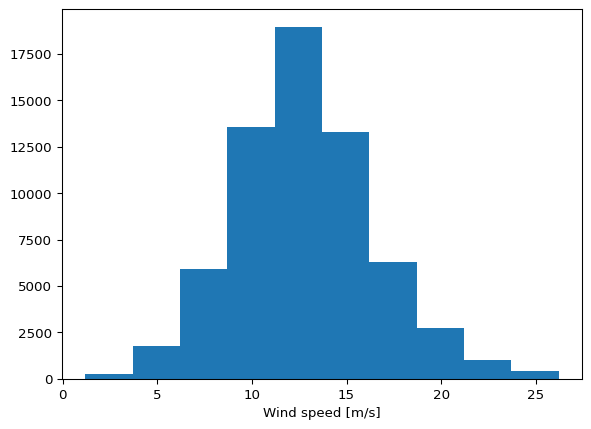

In [7]:
ws2 = ds.Wind_speed.copy()
ws2.plot.hist();

1.  Make the modifications, in this case we will clip the values to the
    interval 1-18 m/s.

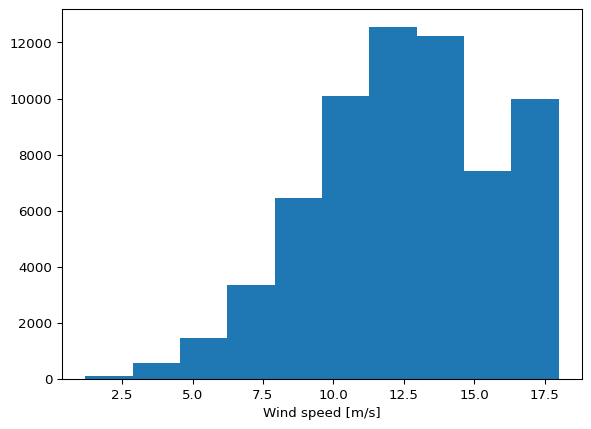

In [8]:
import numpy as np
ws2.values = np.clip(ws2.to_numpy(), 1,18)
ws2.plot.hist();

1.  Assign it to a new name in the dataset

In [9]:
ds["Wind_speed_clipped"] = ws2
ds

<mikeio.Dataset>
dims: (time:67, element:958)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)
geometry: Dfsu2D (958 elements, 570 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Wind speed <Wind speed> (meter per sec)
  2:  Wind_speed_clipped <Wind speed> (meter per sec)

1.  Reorder items if necessary (See [selecting items](#selecting-items)
    above)

In [10]:
ds2 = ds[["Wind_speed_clipped", "Surface elevation", "Wind speed"]]
ds2

<mikeio.Dataset>
dims: (time:67, element:958)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)
geometry: Dfsu2D (958 elements, 570 nodes)
items:
  0:  Wind_speed_clipped <Wind speed> (meter per sec)
  1:  Surface elevation <Surface Elevation> (meter)
  2:  Wind speed <Wind speed> (meter per sec)

1.  Write the new dataset to a new file

In [11]:
ds2.to_dfs("modified.dfsu")

## Properties

The Dataset (and DataArray) has several properties:

-   n_items - Number of items
-   n_timesteps - Number of timesteps
-   n_elements - Number of elements
-   start_time - First time instance (as datetime)
-   end_time - Last time instance (as datetime)
-   is_equidistant - Is the time series equidistant in time
-   timestep - Time step in seconds (if is_equidistant)
-   shape - Shape of each item
-   deletevalue - File delete value (NaN value)

## Methods

Dataset (and DataArray) has several useful methods for working with
data, including different ways of *selecting* data:

-   [`sel()`](../api/Dataset.html#mikeio.Dataset.sel) - Select subset
    along an axis
-   [`isel()`](../api/Dataset.html#mikeio.Dataset.isel) - Select subset
    along an axis with an integer

*Aggregations* along an axis:

-   [`mean()`](../api/Dataset.html#mikeio.Dataset.mean) - Mean value
    along an axis
-   [`nanmean()`](../api/Dataset.html#mikeio.Dataset.nanmean) - Mean
    value along an axis (NaN removed)
-   [`max()`](../api/Dataset.html#mikeio.Dataset.max) - Max value along
    an axis
-   [`nanmax()`](../api/Dataset.html#mikeio.Dataset.nanmax) - Max value
    along an axis (NaN removed)
-   [`min()`](../api/Dataset.html#mikeio.Dataset.min) - Min value along
    an axis
-   [`nanmin()`](../api/Dataset.html#mikeio.Dataset.nanmin) - Min value
    along an axis (NaN removed)
-   [`average()`](../api/Dataset.html#mikeio.Dataset.average) - Compute
    the weighted average along the specified axis.
-   [`aggregate()`](../api/Dataset.html#mikeio.Dataset.aggregate) -
    Aggregate along an axis
-   [`quantile()`](../api/Dataset.html#mikeio.Dataset.quantile) -
    Quantiles along an axis
-   [`nanquantile()`](../api/Dataset.html#mikeio.Dataset.nanquantile) -
    Quantiles along an axis (NaN ignored)

###  Mathematical operations

-   ds + value

-   ds - value

-   ds \* value

-   ds / value and between two Datasets (if number of items and shapes
    conform):

-   ds1 + ds2

-   ds1 - ds2

-   ds1 \* ds2

-   ds1 / ds2

Other methods that also return a Dataset:

-   [`interp_like`](../api/Dataset.html#mikeio.Dataset.interp_like) -
    Spatio (temporal) interpolation (see [Dfsu interpolation
    notebook](../examples/dfsu/spatial_interpolation.qmd)
-   [`interp_time()`](../api/Dataset.html#mikeio.Dataset.interp_time) -
    Temporal interpolation (see [Time interpolation
    notebook](../examples/Time-interpolation.qmd))
-   [`dropna()`](../api/Dataset.html#mikeio.Dataset.dropna) - Remove
    time steps where all items are NaN
-   [`fillna()`](../api/Dataset.html#mikeio.Dataset.fillna) - Fill
    missing values with a constant value
-   [`squeeze()`](../api/Dataset.html#mikeio.Dataset.squeeze) - Remove
    axes of length 1

### Conversion:

-   [`to_dataframe()`](../api/Dataset.html#mikeio.Dataset.to_dataframe) -
    Convert Dataset to a
    [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame).
-   [`to_xarray()`](../api/Dataset.html#mikeio.Dataset.to_xarray) -
    Convert Dataset to a
    [`xarray.Dataset`](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html#xarray.Dataset)
    (great for Dfs2, Dfs3).
-   [`to_dfs()`](../api/Dataset.html#mikeio.Dataset.to_dfs) - Write
    Dataset to a Dfs file